# IMPACT OF VACCINES AGAINST COVID-19

## 1. Introduction
COVID-19, also known as the coronavirus disease, is a global pandemic that has affected the lives of millions of people around the world. It is caused by the SARS-CoV-2 virus, which is a highly contagious respiratory illness that can lead to severe illness or death.In this project, we will use Jupyter notebooks to analyze global  COVID-19 data, visualize trends and patterns, and analyze the impact of vaccines towards curbing the spread of the virus. Specifically we will: 

- Carry out Exploratory Data Analysis to explore the trends in terms of cases, deaths and vaccines
- Carry out Bivariate analysis between different vaccine data against  covide deaths and cases
- Perform different statistical test to analyze including t-test and regression analysis 

The data  for this project is obtained from  our world in data at :https://ourworldindata.org/policy-responses-covid


## 2. Importing python libraries  and  setting up  the notebook 
We will begin by importing the necessary libraries . The analysis will mainly use pandas libraries with matplotlib and  seaborn  afor visualization.  We will also need the sklearn and scipy libraries for statistical analysis and  and linear modelling 

In [1]:
#Dataframe library
import pandas as pd

#numerical  analysis
import numpy as np

#basic visualization
import matplotlib.pyplot as plt

#advanced visualization
import seaborn as sns

#test of means
from scipy.stats import ttest_ind

#linear modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#directory changes
import os

In [2]:
# seaborn plot style
sns.set_style('darkgrid')

## 3.  Loading, cleaning and transforming the data

We will then proceed to load the csv file.The next step will be undertanding our dataset. This will include checking the shape (number of rows and columns), data types, missing values and any incosistencies . This project will only focus on aggregated global data from csv dataset.Further,  we will also only focus on data that pertains covid cases , deaths and vaccines  thus filtering out the rest.

In [3]:
#Changing the directory
os.chdir('C:/Users/ELITEBOOK COI5/Desktop/Michael Work/Coding & Programming/Public Data/covid -19')

#loading our data
covid_data=pd.read_csv('owid-covid-data.csv')

#confirming the  data has been  loaded into the data sheet
covid_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
#selecting only  global data from the  location field

covid_data_global=covid_data[covid_data['location']=='World']
covid_data_global.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
240767,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240768,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240769,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240770,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240771,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


In [5]:
#Selecting only the required columns (The datasheet contains 67 columns , we only select a few )

covid_data_global=covid_data_global[['date','total_cases', 'new_cases','total_deaths', 'new_deaths','total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
        'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',  'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',]]

In [6]:
covid_data_global.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,total_vaccinations,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
240767,2020-01-22,557.0,0.0,17.0,0.0,0.002,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240768,2020-01-23,657.0,100.0,18.0,1.0,0.002,0.000,NaN,3.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240769,2020-01-24,944.0,287.0,26.0,8.0,0.003,0.001,NaN,3.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240770,2020-01-25,1437.0,493.0,42.0,16.0,0.005,0.002,NaN,3.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240771,2020-01-26,2120.0,683.0,56.0,14.0,0.007,0.002,NaN,3.54,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Converting   the date  column from object  to date
covid_data_global['date']=pd.to_datetime(covid_data_global['date'])

In [8]:
#Extracting  month and year from date
covid_data_global['Year'] = covid_data_global['date'].dt.year
covid_data_global['Month'] = covid_data_global['date'].dt.month_name()

In [9]:
#Calculating the seven day average for new cases and new deaths
covid_data_global['new_cases_rolling_mean']= covid_data_global['new_cases'].rolling(7).mean()
covid_data_global['new_deaths_rolling_mean']= covid_data_global['new_deaths'].rolling(7).mean()

In [10]:
#Confirming our new dataframe has the data as required
covid_data_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 240767 to 241833
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        1067 non-null   datetime64[ns]
 1   total_cases                                 1067 non-null   float64       
 2   new_cases                                   1067 non-null   float64       
 3   total_deaths                                1067 non-null   float64       
 4   new_deaths                                  1067 non-null   float64       
 5   total_deaths_per_million                    1067 non-null   float64       
 6   new_deaths_per_million                      1067 non-null   float64       
 7   new_deaths_smoothed_per_million             1062 non-null   float64       
 8   reproduction_rate                           1063 non-null   float64       
 9   t

### 4. EXPLORATORY DATA ANALYSIS

Exploratory data analysis (EDA) is a crucial step in the data analysis process that involves examining and summarizing the main characteristics of a dataset. By performing EDA, we can identify patterns, trends, and relationships within the data, as well as detect any anomalies or inconsistencies that may require further investigation. In this project, we will utilize EDA techniques such as line and bar graphs to explore the trend of COVID-19 transmission and vaccine impact. Additionally, we will conduct correlation analysis to determine the nature of relationships between various variables and gain a better understanding of the spread and transmission of the virus. Through EDA, we aim to gain a comprehensive understanding of the COVID-19 pandemic and the impact of vaccines on its spread. 

In [11]:
#This function plots a simple line graph
def line_plot(df, x_col, y_col):
    plt.figure(figsize=(15,8))
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.show()
    

In [12]:
#This functions  plots a simple bar plot
def line_plot2(df, x_col, y_col1, y_col2):
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.lineplot( x = x_col, y = y_col1,  data = df, ax=ax) 
    sns.lineplot(x=x_col, y=y_col2, data=df,  linestyle='--', color='red', ax=ax)
    ax.legend(labels=[y_col1, y_col2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    plt.show()

    

In [13]:
# This function creates a scatter plot
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.show()

### Cumulative Cases and Deaths

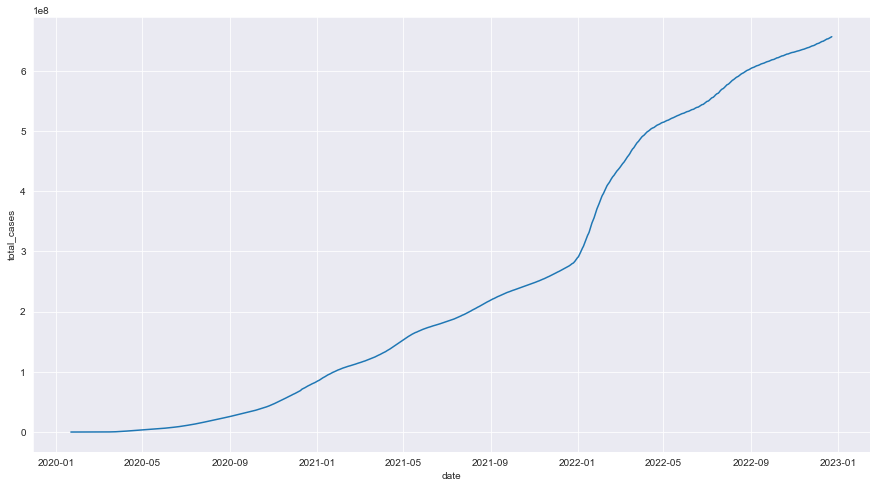

In [14]:
# Global cases 
line_plot(covid_data_global, 'date', 'total_cases')

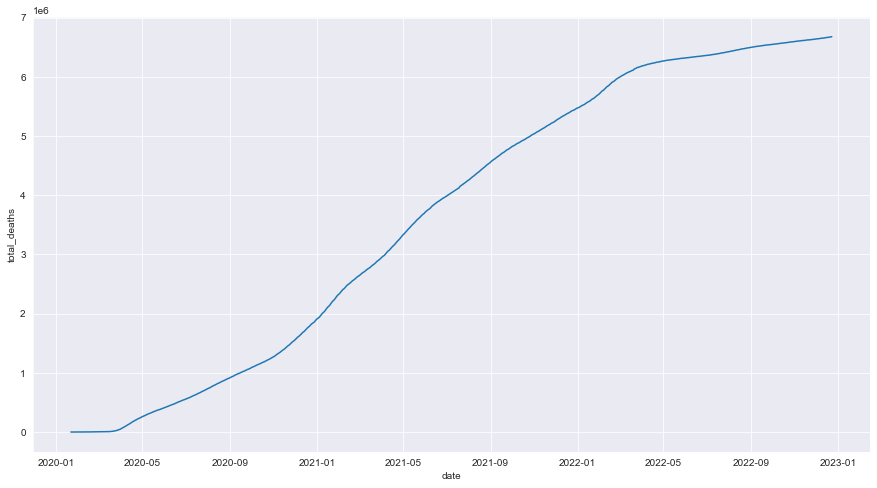

In [15]:
#global_deaths
line_plot(covid_data_global, 'date', 'total_deaths')

### Daily Cases and Deaths

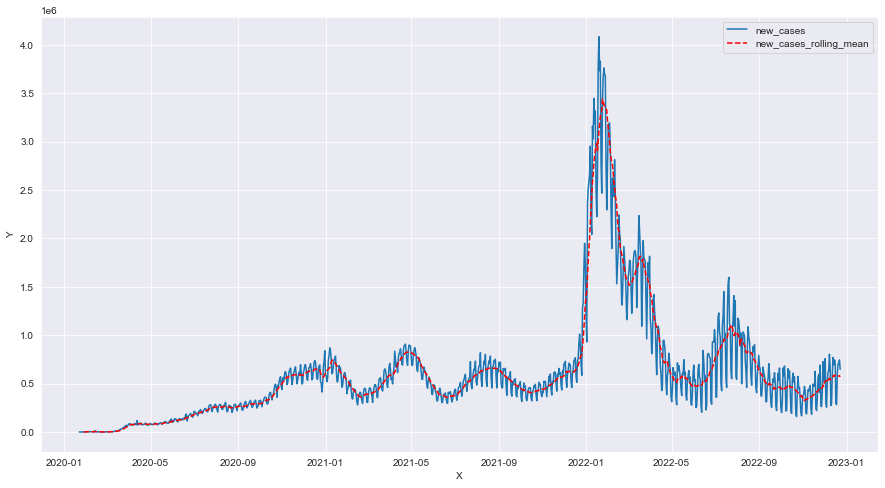

In [16]:
#Daily cases
line_plot2(covid_data_global, 'date','new_cases', 'new_cases_rolling_mean' )

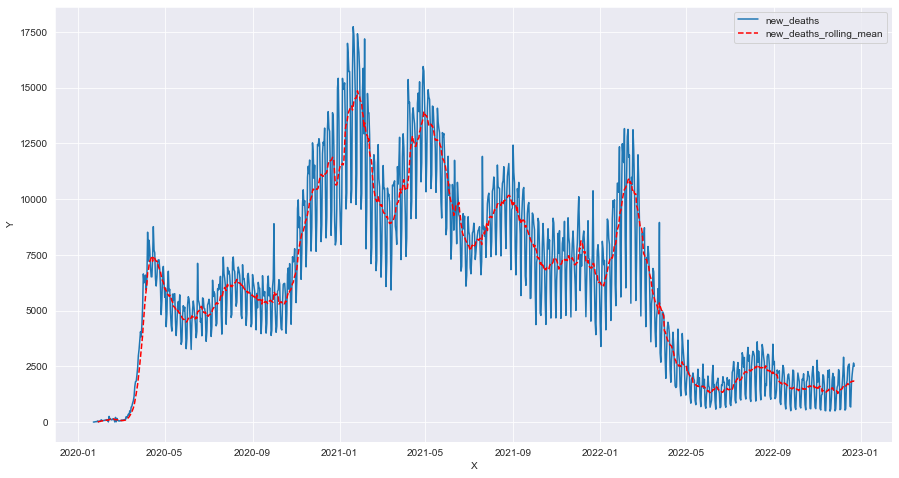

In [17]:
#Daily deaths
line_plot2(covid_data_global, 'date','new_deaths', 'new_deaths_rolling_mean' )

In general, the trend of COVID-19 cases has followed a pattern of initial spread, followed by a peak in cases, and then a decline as measures are put in place to control the spread of the virus. However, the exact shape of the curve can vary depending on a number of factors, including the effectiveness of containment and mitigation measures, the level of testing and contact tracing being conducted, and the population's adherence to social distancing and other preventive measures.

### Reproductive rate

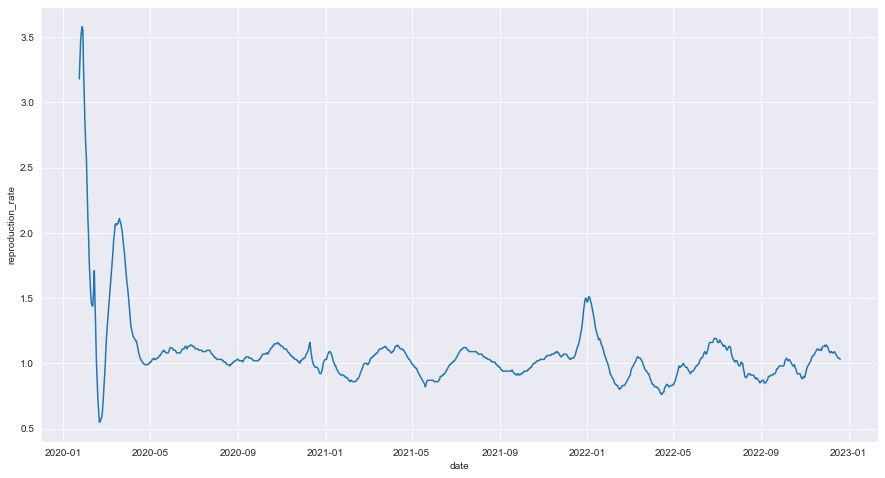

In [18]:
#reproduction_rate 
line_plot(covid_data_global, 'date', 'reproduction_rate')

The reproductive number, or R0 (pronounced "R naught"), is a measure of the average number of people that an infected person will transmit the virus to. It is an important factor in understanding the potential spread of an infectious disease. A high R0 means that an infected person is likely to transmit the virus to a large number of people, which can lead to rapid and widespread transmission. A low R0 means that an infected person is only likely to transmit the virus to a small number of people, which can help to slow or stop the spread of the disease.

Towards the beginning of the panding  COVID-19's R0 thought to be around 2.5, which means that an infected person is likely to transmit the virus to about 2.5 other people, on average.This averaged to to between 1 and 1.5  pandemic contuned.  The reproductive number can vary depending on a number of factors, including the effectiveness of containment and mitigation measures, the level of testing and contact tracing being conducted, and the population's adherence to social distancing and other preventive measures.

### Vaccinations

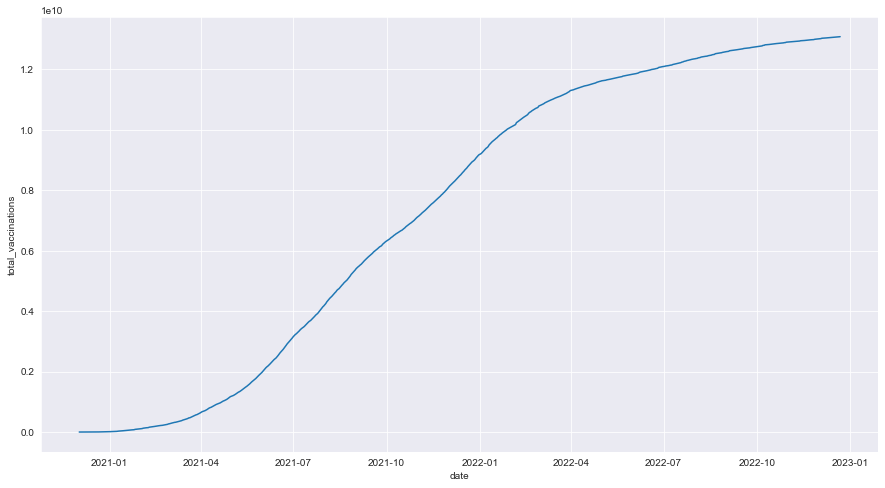

In [19]:
#total_vaccinations
line_plot(covid_data_global, 'date', 'total_vaccinations')

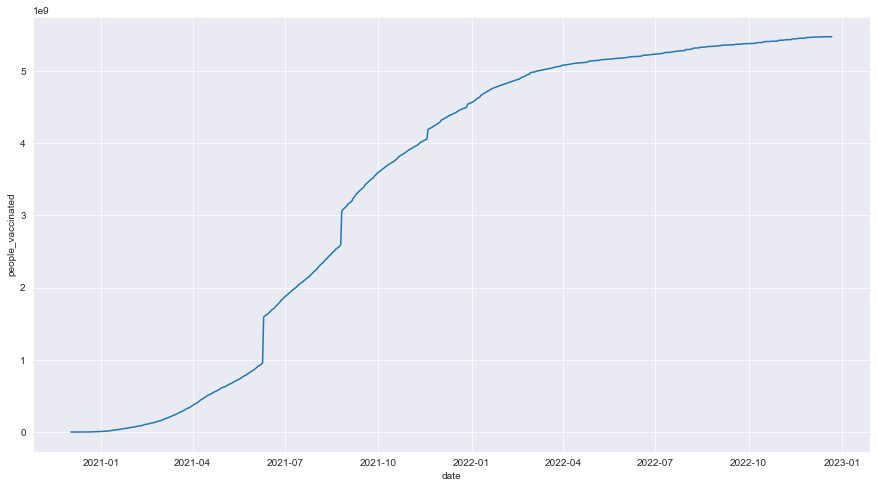

In [20]:
line_plot(covid_data_global, 'date', 'people_vaccinated')


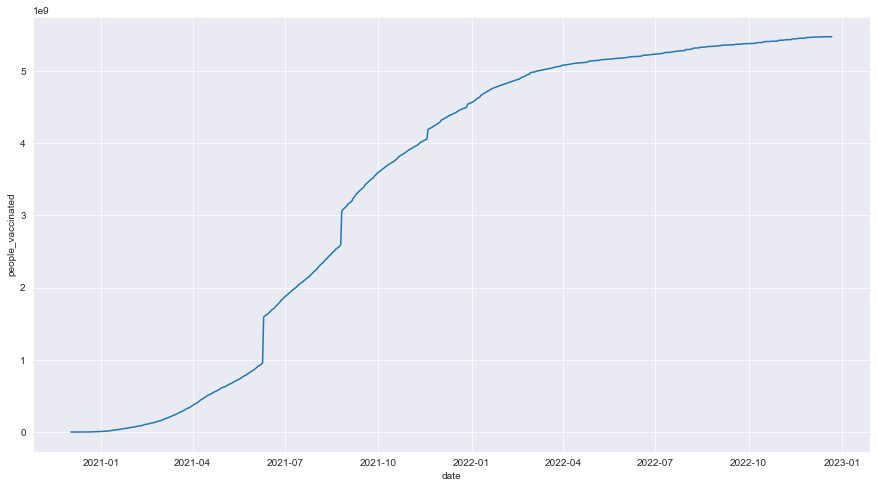

In [21]:
line_plot(covid_data_global, 'date', 'people_vaccinated')

The rollout of COVID-19 vaccines has varied significantly from one country to another. In general, the distribution of vaccines has followed a pattern of priority groups being offered the vaccine first, followed by a wider rollout to the general population. Priority groups have typically included healthcare workers, older adults, and individuals with underlying health conditions that put them at higher risk for severe illness or complications from COVID-19.

The rate at which vaccines have been administered has also varied widely. Some countries have been able to vaccinate a large portion of their population relatively quickly, while others have faced challenges with procurement, distribution, and administration of the vaccine.

### Vaccines vs Covid
In this analysis, we will examine the impact of COVID-19 vaccines on the trend of the virus's spread and transmission. We will investigate whether the introduction of vaccines led to a reduction in cases and deaths, and how effective they were in flattening the curve. The shaded region represents the time period when vaccines were introduced.

In [61]:
#Partioning our data based on whether it was during or before vaccination
conditions= [covid_data_global['new_vaccinations']== 0,
            covid_data_global['new_vaccinations']>=1]
values=[0,1]
covid_data_global['vaccination']=np.select(conditions, values)


Text(0.5, 0, 'Date')

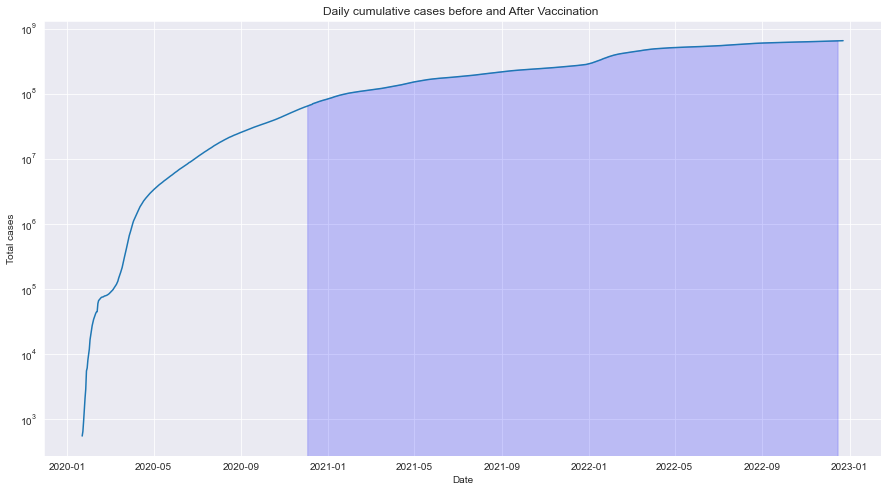

In [62]:
#Cumulative cases vs vaccination

plt.figure(figsize=(15,8))
plt.plot( covid_data_global['date'], covid_data_global['total_cases'])
plt.fill_between(covid_data_global["date"], covid_data_global['total_cases'],where=covid_data_global["vaccination"]==1, color="blue", alpha=0.2)
plt.yscale('log')
plt.title('Daily cumulative cases before and After Vaccination ')
plt.ylabel('Total cases')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

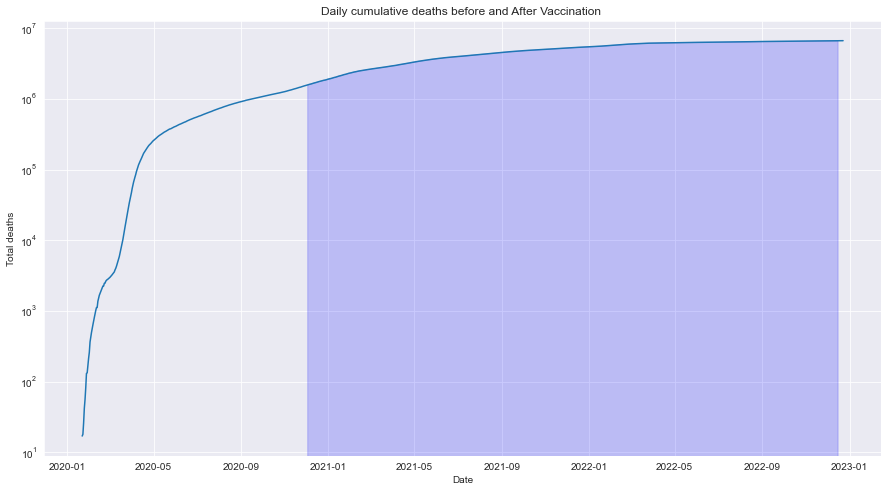

In [63]:
#Cumulative deaths vs vaccination

plt.figure(figsize=(15,8))
plt.plot( covid_data_global['date'], covid_data_global['total_deaths'])
plt.fill_between(covid_data_global["date"], covid_data_global['total_deaths'],where=covid_data_global["vaccination"]==1, color="blue", alpha=0.2)
plt.yscale('log')
plt.title('Daily cumulative deaths before and After Vaccination ')
plt.ylabel('Total deaths')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

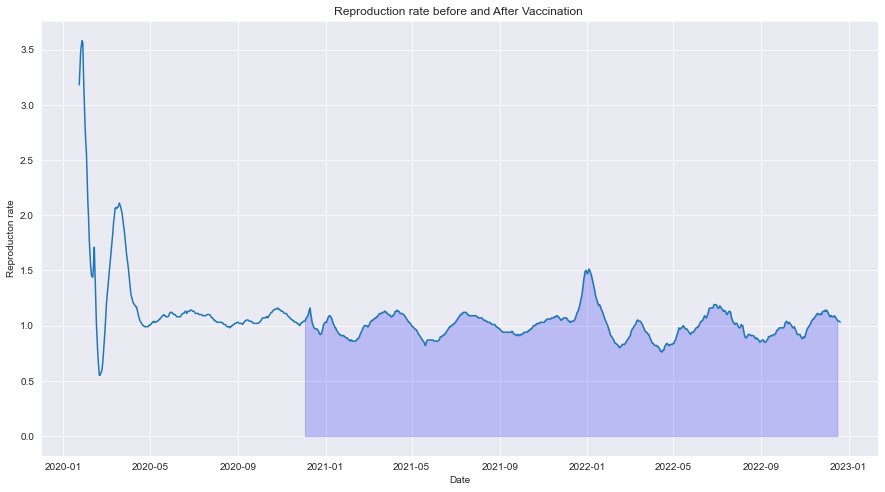

In [64]:
#Reproduction rate vs vaccination

plt.figure(figsize=(15,8))
plt.plot( covid_data_global['date'], covid_data_global['reproduction_rate'])
plt.fill_between(covid_data_global["date"], covid_data_global['reproduction_rate'],where=covid_data_global["vaccination"]==1, color="blue", alpha=0.2)
plt.title('Reproduction rate before and After Vaccination ')
plt.ylabel('Reproducton rate')
plt.xlabel('Date')

It is generally believed that vaccines can help flatten the curve of an infectious disease by reducing the rate of transmission and the number of severe cases. This can help to relieve pressure on the healthcare system and prevent the outbreak from reaching a level that would overwhelm the capacity of hospitals and other healthcare facilities.It is important to note that the impact of vaccines on the curve of an outbreak will depend on a variety of factors, including the effectiveness of the vaccines, the rate at which they are administered, and the behaviors of individuals in the population (such as wearing masks and practicing social distancing).

### Bivariate Analysis
Bivariate analysis is a useful tool for exploring the relationship between two variables and understanding how they are related. It is often used as a preliminary step in data analysis to identify patterns and relationships in the data that can be further explored using more advanced statistical methods. There are several ways to carry out bivariate analysis , however in this project we are mainly going to use ht use scatterplots and a correlation coefficients out data is mostly continous

In [31]:
#scatterplot
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.show()

### Correlation Anlysis

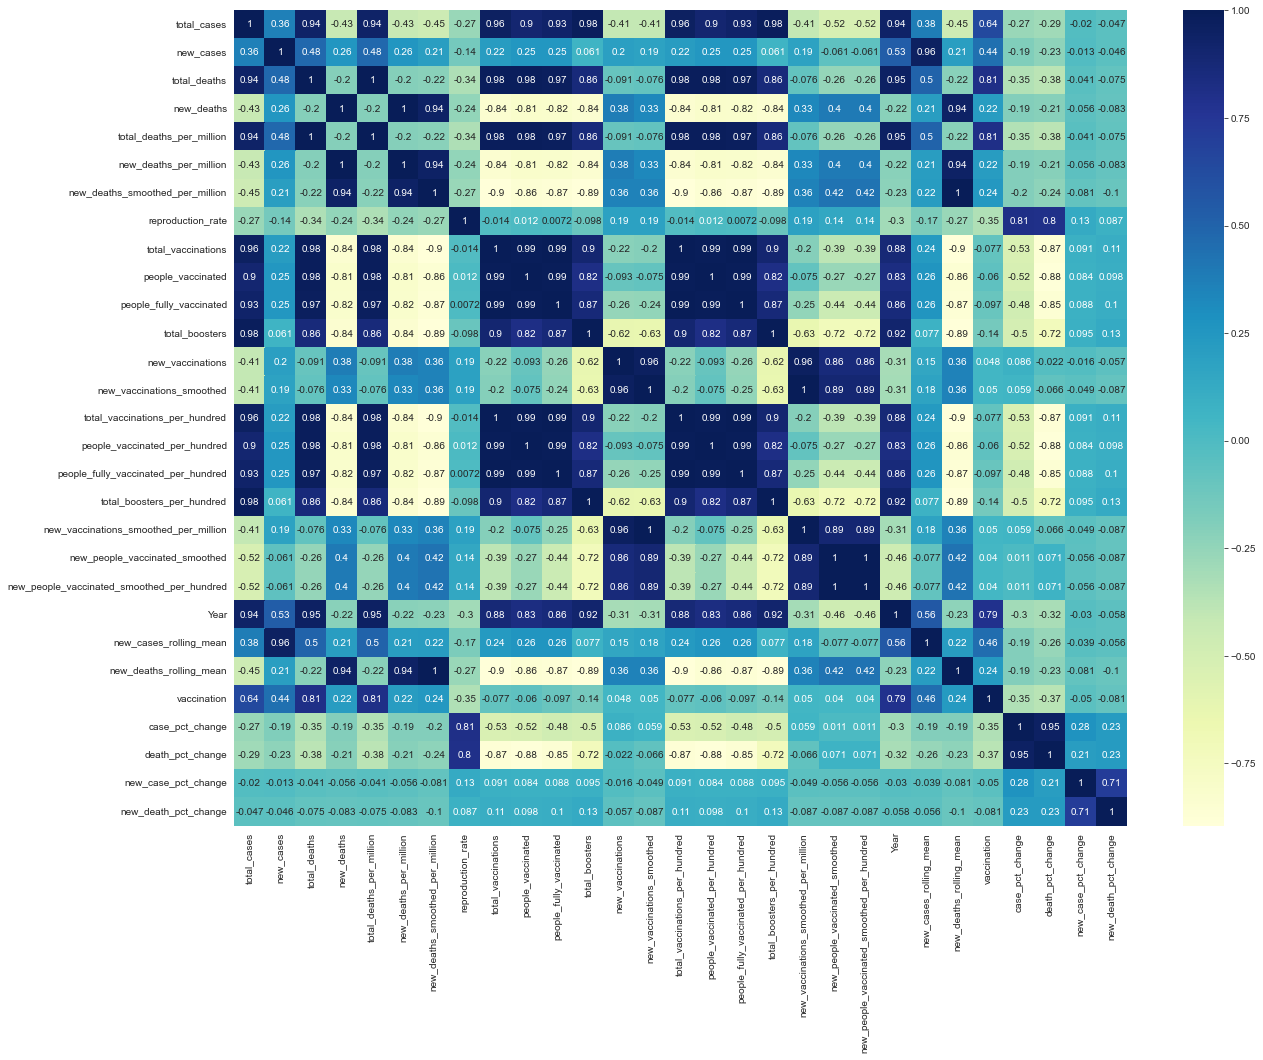

In [32]:
#Creating a correlation heatmap

corr_matrix=covid_data_global.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

The  correlaton matrix above shows the correlation between a set of variables.  It is useful for understanding the relationships between different variables in a dataset, and for identifying variables that are highly correlated with each other. Together with the scatter plot , it will a preliminary step in data analysis to identify patterns and relationships in the data that can be further explored using more advanced statistical methods. From the matrix above we have identified the following variabls that  show  relatively high level of correlation compared to the rest. For the rest of the analysis  will only focus on these

- total_cases
- total_deaths
- new_cases
- new_deaths
- reproduction_rate
- total_vaccinaions
- new_vaccinations
- people_vaccinated
- people_fully_vaccinated
- reproduction_rate
- total_boosters
- case_pct_change
- death_pct_change
- new_case_pct_change
- new_death_pct_change
- vaccination


In [67]:
#Selecting a varaibles of interest
covid_data_global_analysis=covid_data_global[['total_cases', 'new_cases','total_deaths','new_deaths', 'reproduction_rate', 'total_vaccinations',
                                             'new_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_boosters', 
                                              'case_pct_change', 'death_pct_change','new_case_pct_change', 'new_death_pct_change', 'vaccination'
                                                 ]]

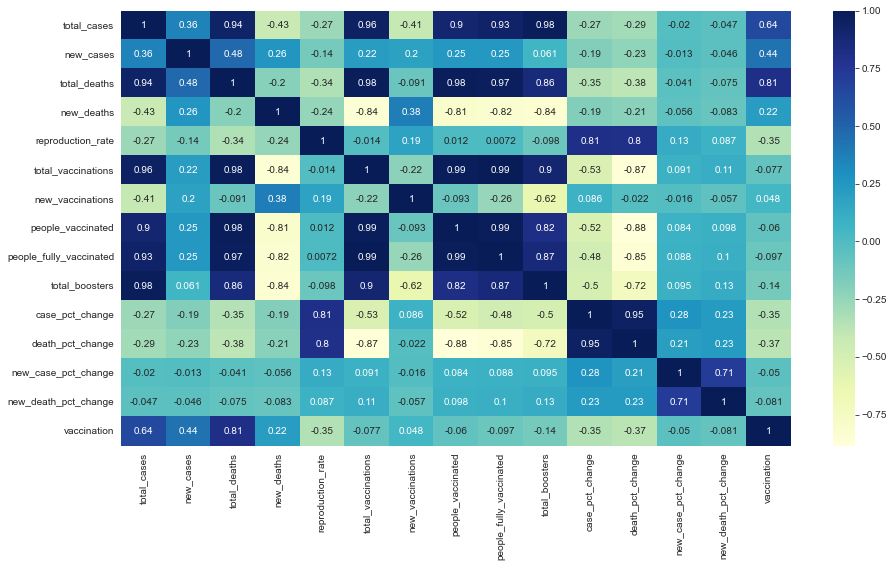

In [68]:
#correlation matrix
corr_matrix2= covid_data_global_analysis.corr()

#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix2, cmap="YlGnBu", annot=True)


### Scatterplot
We will explore  different scatterplots to visualize relationships between  the selected varriables

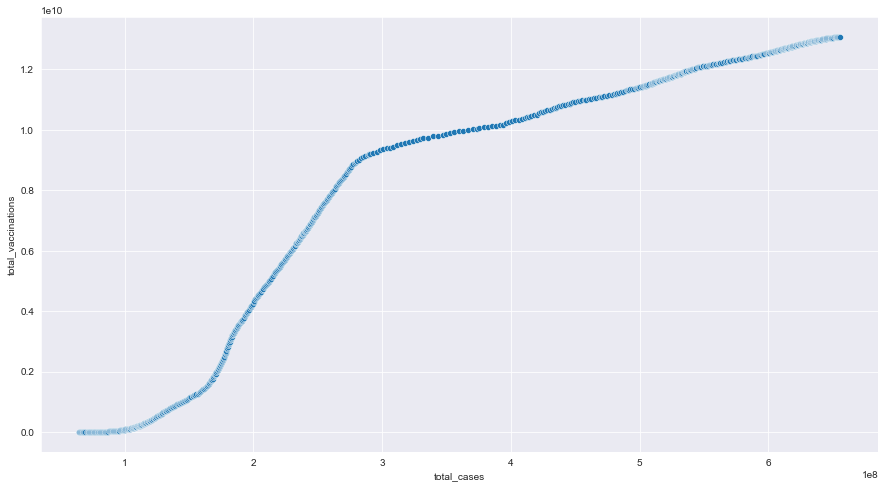

In [70]:
#scatterplot
scatter_plot(covid_data_global_analysis, 'total_cases', 'total_vaccinations')

In [36]:
x = np.log(covid_data_global_analysis['total_cases'], dtype='float64')
y = np.log(covid_data_global_analysis['new_vaccinations'], dtype='float64')


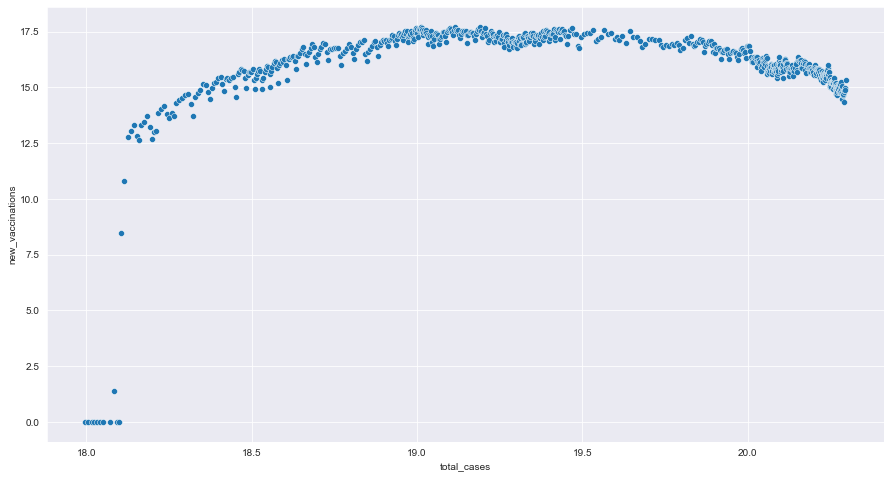

In [37]:
scatter_plot(covid_data_global_analysis, x, y)

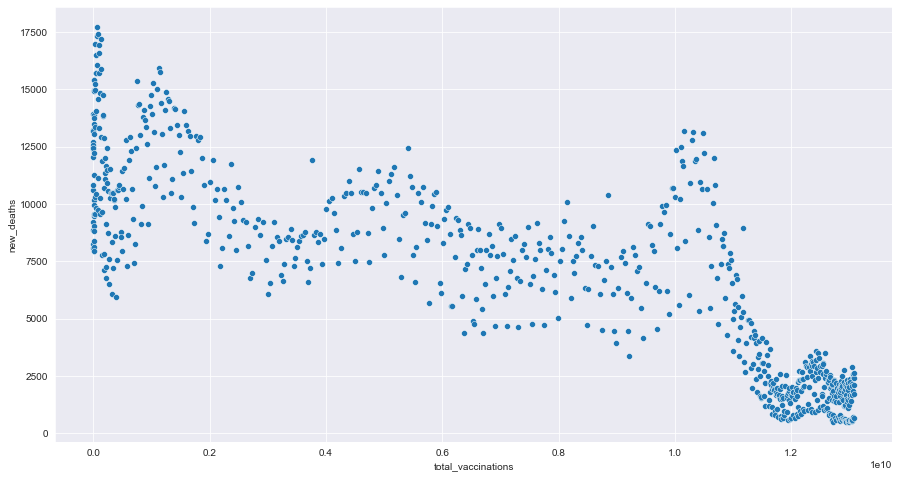

In [38]:
scatter_plot(covid_data_global_analysis, 'total_vaccinations','new_deaths')

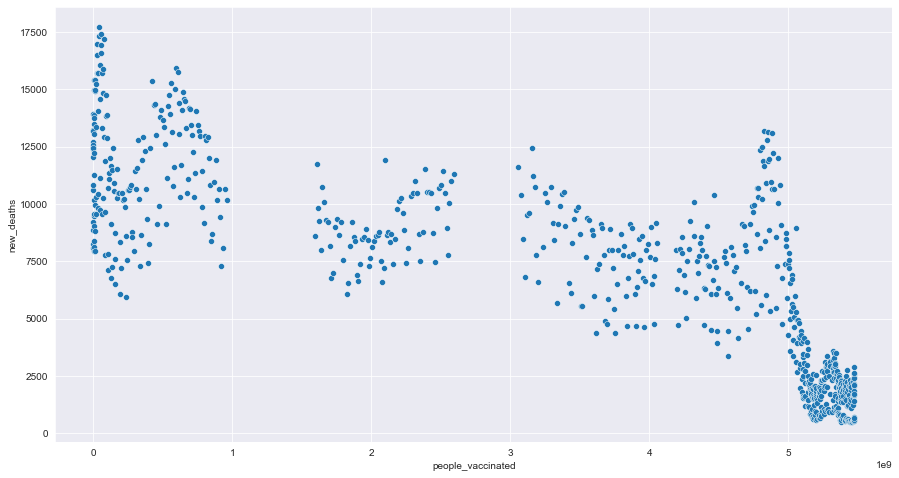

In [39]:
scatter_plot(covid_data_global_analysis, 'people_vaccinated','new_deaths')

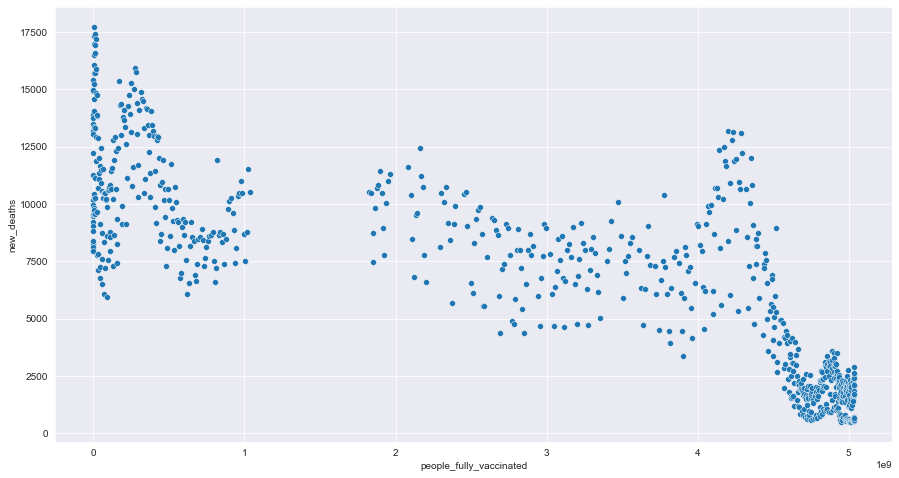

In [40]:
scatter_plot(covid_data_global_analysis, 'people_fully_vaccinated','new_deaths')

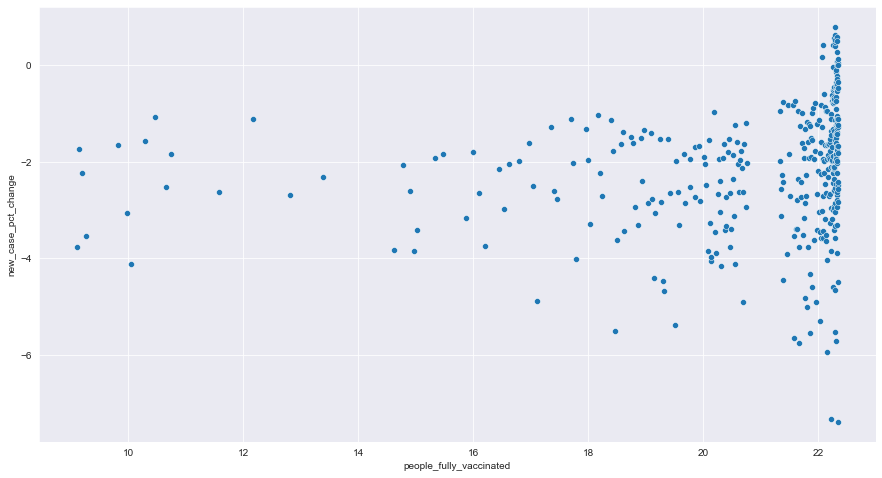

In [41]:
y = np.log(covid_data_global_analysis['new_case_pct_change'], dtype='float64')
x = np.log(covid_data_global_analysis['people_fully_vaccinated'], dtype='float64')

scatter_plot(covid_data_global_analysis, x, y)

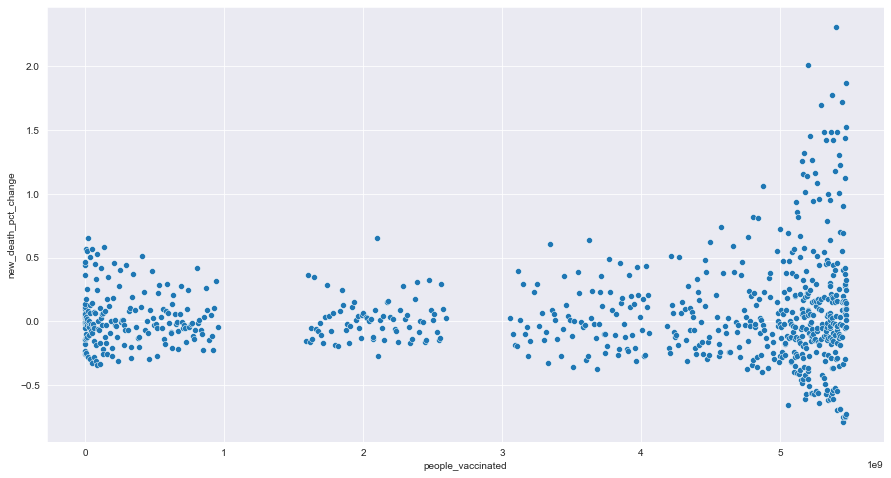

In [42]:
scatter_plot(covid_data_global_analysis, 'people_vaccinated','new_death_pct_change')

## 5. Inferential Analysis

Inferential Analysis t deals with making inferences about a population based on a sample. It involves using statistical methods to make predictions or estimates about a population based on sample data.For our project  we are going to focus  on two types  inferential statistics:
- Hypothesis testing
- Regression analysis

### Hypothesis testing 
A t-test is a statistical procedure that allows us to compare the means of two groups and determine whether there is a significant difference between them. In our project, we will be using t-tests to evaluate the impact of COVID-19 vaccines on the spread and transmission of the virus. We will divide our data into two groups based on whether vaccines have been introduced at that particular time  or not, and then perform two sets of t-tests to compare the means of these two groups. By analyzing the results of these t-tests, we will be able to determine whether the introduction of vaccines has had a significant effect on the transmission of COVID-19. A t-test will then be performed to:
- compare the mean new cases before and after vaccines
- compare the mean new deaths before and after vaccines

In [71]:
#Splitting our data into groups
group_A=covid_data_global_analysis[covid_data_global_analysis['vaccination']==0]
group_B=covid_data_global_analysis[covid_data_global_analysis['vaccination']==1]

In [72]:
#testing whether there was a change in new deaths before and after beginning of vaccination using the scipy library
ttest_ind(group_A['new_deaths'], group_B['new_deaths'])

Ttest_indResult(statistic=-7.300188250819577, pvalue=5.612803180151069e-13)

The t-test result above indicates that there is a significant difference between the means of the two groups being compared. (N/B t-test assumes the data is normal , It is important to note that the t-test assumes that the data is normally distributed and that the variances of the two groups are equal. If these assumptions are not met, the results of the t-test may not be reliable.)

In [46]:
#testing whether there was a change in new cases before and after beginning of vaccination
ttest_ind(group_A['new_cases'], group_B['new_cases'])

Ttest_indResult(statistic=-15.990920471257425, pvalue=9.479509569697925e-52)

Similarly, the t-test result also  indicates that there is a significant difference between the means of the two groups being compared. (N/B t-test assumes the data is normal , It is important to note that the t-test assumes that the data is normally distributed and that the variances of the two groups are equal. If these assumptions are not met, the results of the t-test may not be reliable.)

### Predicting new deaths  using regression analysis 
Regression analysis is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is used to make predictions about the dependent variable based on the values of the independent variables. We are going to use regression analysis  predict  new covid deaths based on a number of variables inlcuding total_cases, new_cases,  'total_vaccinations, new_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters,  and  vaccination period (before or after).
The scikit-learn (sklearn) library is a popular library for performing regression analysis. To use sklearn for regression, you will first need to import the necessary modules, such as LinearRegression from the linear_model module (which we have done at the beginning of the notebook.

We will also  split our data into training set and testing set and perform standardization of our dataset before fit our model

In [53]:
#Selecting predictor variables 

X =covid_data_global_analysis[['total_cases', 'new_cases',  'total_vaccinations', 
        'new_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'vaccination']].fillna(0)
# Select the column that will be the dependent variable
y=covid_data_global_analysis['new_deaths'].fillna(0)


In [54]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Standardize the training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [56]:
# Fit the multiple linear regression model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
# Use the model to make predictions about the number of new deaths on the test data
predictions = regressor.predict(X_test)

In [58]:
# Calculate the mean squared error of the predictions
mse = ((predictions - y_test) ** 2).mean()

# Print the mean squared error
print(mse)

4087292.5531609766


In [60]:
r2 = r2_score(y_test, predictions)

# Print the R-squared score
print(r2)

0.7461643976579444


The R_2 score, also known as the coefficient of determination, is a metric that measures the proportion of variance in the dependent variable that is explained by the independent variables. It is a measure of how well the model fits the data.A score of 1 indicates that the model perfectly fits the data, while a score of 0 indicates that the model does not explain any of the variance in the dependent variable.

Our  R_2 score of 0.74 means that the model explains 74% of the variance in the dependent variable. This can be interpreted as follows: if the model is used to make predictions on new data, we can expect that the predictions will be accurate to within 74% of the variance in the dependent variable.It is important to note that an R_2 score of 0.74 does not necessarily mean that the model is a good fit for the data. There are many factors that can influence the R_2 score, such as the number of independent variables, the strength of the relationships between the variables, and the presence of outliers or other anomalies in the data.To evaluate the quality of the model, it is often helpful to compare the R_2 score to other metrics, such as the mean squared error or the root mean squared error, and to plot the data and the fitted model to visualize the fit. It is also important to consider whether the model is appropriate for the specific research question and whether it meets the assumptions of the regression model being used.